
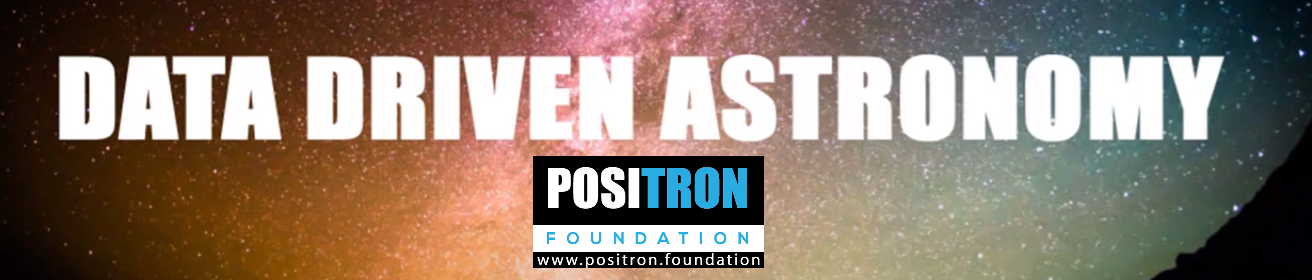




Welcome to **Data Driven Astronomy** Online course organized by **Positron Foundation**


In [ ]:
!pip install sep --quiet
!pip install photutils --quiet
!pip install astroquery --quiet

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 832 kB 5.1 MB/s 
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 802 kB 66.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.0 MB 43.6 MB/s 


In [ ]:
import numpy as np
import astropy
from matplotlib import pyplot as plt
from astroquery.skyview import SkyView
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.modeling import models, fitting
# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

In [ ]:
# Do no change.
!git clone https://github.com/Jack3690/DDA

Cloning into 'DDA'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 253 (delta 114), reused 120 (delta 30), pack-reused 0
Receiving objects: 100% (253/253), 35.97 MiB | 25.96 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
cd DDA/Week_1/data

/content/DDA/Week_1/data


Save the output diff as a fits file with name 'puzzle_2_solution.fits' and download it for submission and for future reference.

# **Puzzle III**

Write code for getting 'SDSSg' image of 'NGC 4826' with radius 10 arcminutes and 512 pixels.

In [ ]:
# Complete the code
path = SkyView.get_images(position='NGC 4826', radius=10*u.arcmin,pixels=512,survey='SDSSg')
data = path[0][0].data

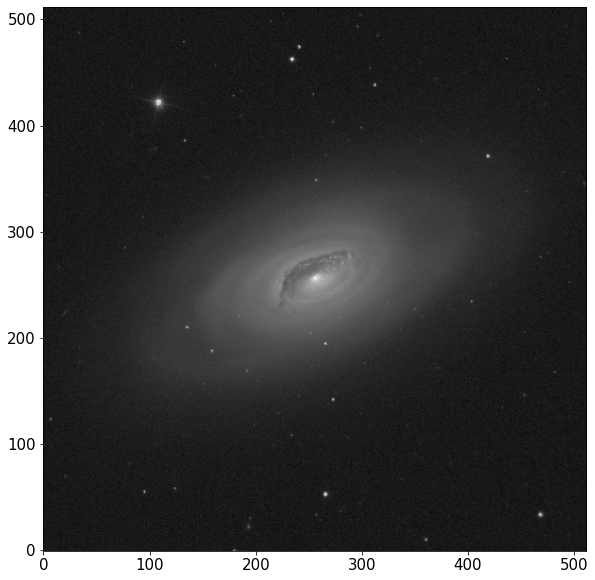

In [ ]:
# Plot the data with standard setting i.e. LogStretch, cmap='gray' and origin='lower'
norm= ImageNormalize(data,stretch=LogStretch())
plt.imshow(data,cmap='gray',origin='lower',norm=norm)

Write code for moddeling the data using Gaussian2D and LevMarLSQFitter

In [ ]:
# Model
init = models.Gaussian2D()

# Fitting methid
fit = fitting.LevMarLSQFitter()

# x y coordinates
y,x = np.mgrid[-256:256,-256:256]/256

model = fit(init,x,y,z=data)

model

<Gaussian2D(amplitude=2.92948519, x_mean=0.0029598, y_mean=-0.00549063, x_stddev=0.17629517, y_stddev=0.10642525, theta=0.32825072)>

Subtract data from model to create residual image and plot the residual image with standard settings

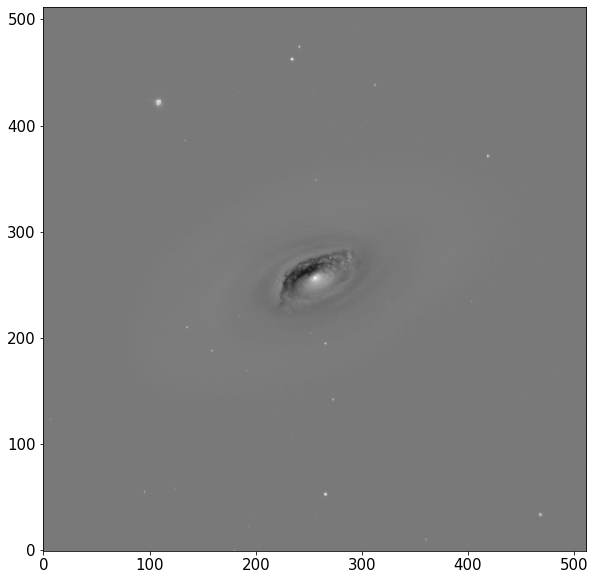

In [ ]:
resid = data - model(x,y)
norm = ImageNormalize( resid,stretch=LogStretch())
plt.imshow(resid, norm=norm, cmap='gray', origin='lower')


We can clearly see the dust lanes in the residual image. Therefore we see residual images help in extracting underlying structures in images

Write code for getting the image data from the fits file 'puzzle_3.fits'.

In [ ]:
f = fits.open('puzzle_3.fits')
data_p =  f[0].data        # Puzzle data

Subtract 'resid' from puzzle data and plot the resultant array using standard setting

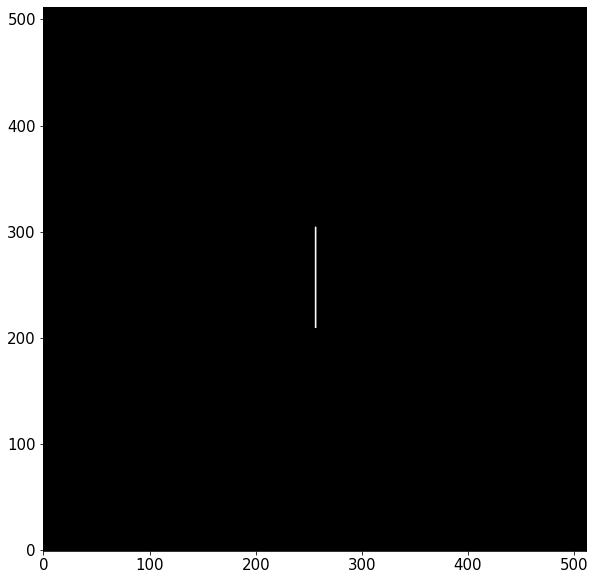

In [ ]:
data_p3 = data_p - resid
norm= ImageNormalize(data_p3,stretch=LogStretch())
plt.imshow(data_p3, cmap='gray', origin='lower',norm=norm)

Upload 'puzzle_1_solution.fits' and 'puzzle_2_solution.fits' to DDA/Week_1/data folder in current colab session and load the fits data

In [ ]:
f1 = fits.open( 'puzzle_1_solution.fits')
data_p1 = f1[0].data

f2 = fits.open( 'puzzle_2_solution.fits')
data_p2 = f2[0].data

Write code for adding for adding data_p1, data_p2, and data_p3. Plot the resultant array

(-0.5, 511.5, -0.5, 511.5)

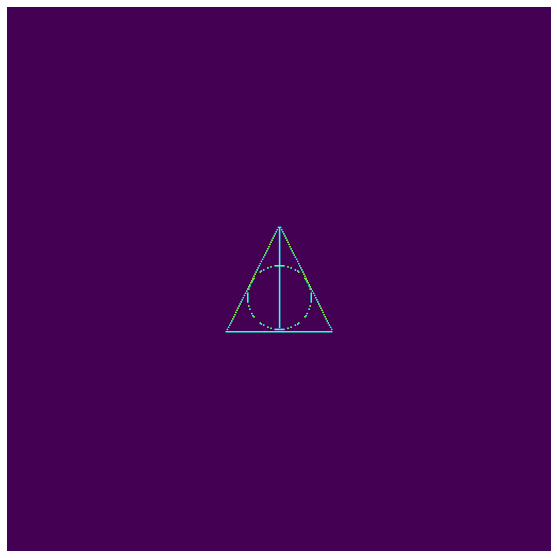

In [ ]:
data_sum =  data_p3 + data_p2 + data_p1
norm = ImageNormalize(data_sum, stretch=LogStretch())
plt.imshow(data_sum,origin='lower',norm=norm)
plt.axis('off')

Save the final array as a fits file with name 'puzzle_3_solution.fits' for submission and future reference.

In [ ]:
hdu = fits.PrimaryHDU(data_sum)
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_3_solution.fits', overwrite = True)